### Importing Needed Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('Student_Marks.csv')

### Reading the Data (Data Preprocessing)

In [3]:
df.head() #  Take a look at the dataset

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [4]:
df.info() #  Looking for the missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [5]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [6]:
df.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

### Take a Look at the Data on Scatter Plot

#### Relation Between Time Study and Marks

Text(0, 0.5, 'Marks')

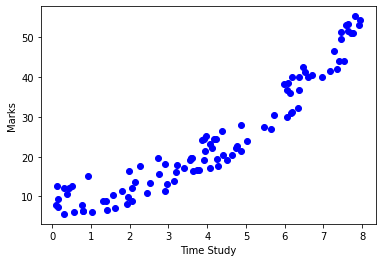

In [7]:
plt.scatter(df.time_study, df.Marks,  color='blue')
plt.xlabel("Time Study")
plt.ylabel("Marks")

#### Relation Between Number Courses and Time Study

Text(0, 0.5, 'Time Study')

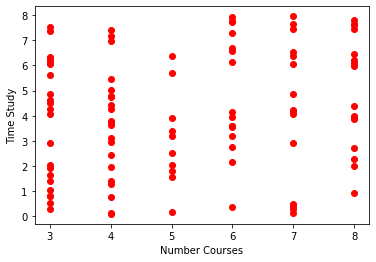

In [8]:
plt.scatter(df.number_courses, df.time_study,  color='red')
plt.xlabel("Number Courses")
plt.ylabel("Time Study")

#### Relation Between Marks Study and Number Courses

Text(0, 0.5, 'Number Courses')

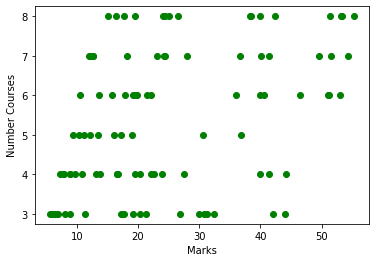

In [9]:
plt.scatter(df.Marks, df.number_courses, color='green')
plt.xlabel("Marks")
plt.ylabel("Number Courses")

Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing. Let's split our dataset into train and test sets. Around 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using the np.random.rand() function:

In [10]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

### Data Distribution on Scatter Plot

#### Train Distribution

Text(0, 0.5, 'Marks')

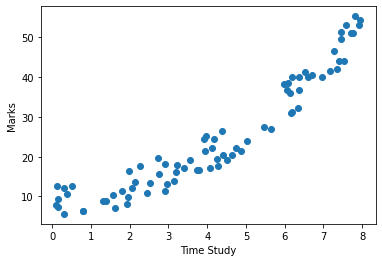

In [11]:
plt.scatter(train.time_study, train.Marks)
plt.xlabel('Time Study')
plt.ylabel('Marks')

#### Test Distribution

Text(0, 0.5, 'Marks')

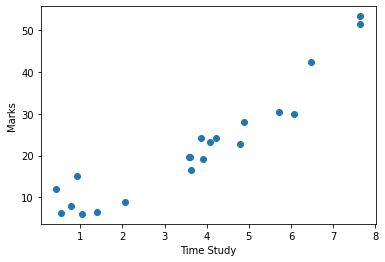

In [12]:
plt.scatter(test.time_study, test.Marks)
plt.xlabel('Time Study')
plt.ylabel('Marks')

### Multiple Regression Model

In reality, there are multiple variables that impact the **Marks**. When more than one independent variable is present, the process is called multiple linear regression. An example of multiple linear regression is predicting **Marks** using the features **number_courses** and **time_study** of students. The good thing here is that multiple linear regression model is the extension of the simple linear regression model.

In [13]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['number_courses', 'time_study']])
y = np.asanyarray(train[['Marks']])
regr.fit(x, y)
# The coefficients
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[1.9056802  5.46843542]]
Intercept:  [-7.85213335]



𝑦̂ = -6.17245925 + (1.71251229 ⋅ X<sub>1</sub>) + (5.33562049 ⋅ X<sub>2</sub>)

Coefficient and Intercept are the parameters of the fitted line. Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ( 𝑦̂  ) over all samples in the dataset.

In [14]:
y_hat = regr.predict(test[['number_courses', 'time_study']])
x = np.asanyarray(test[['number_courses', 'time_study']])
y = np.asanyarray(test[['Marks']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 12.16
Variance score: 0.93


### Making Predictions

If you work 8 hours to 7 lectures:

In [15]:
regr.predict([[7, 8]])

array([[49.23511143]])

If you work 1 hours to 7 lectures:

In [16]:
regr.predict([[7, 1]])

array([[10.95606348]])

### Polynomial Regression

#### Importing Libraries for Polynomial Regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [18]:
train_x = np.asanyarray(train[['time_study']])
train_y = np.asanyarray(train[['Marks']])

test_x = np.asanyarray(test[['time_study']])
test_y = np.asanyarray(test[['Marks']])


poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.00000000e+00, 4.50800000e+00, 2.03220640e+01, 9.16118645e+01],
       [1.00000000e+00, 9.60000000e-02, 9.21600000e-03, 8.84736000e-04],
       [1.00000000e+00, 3.13300000e+00, 9.81568900e+00, 3.07525536e+01],
       [1.00000000e+00, 7.90900000e+00, 6.25522810e+01, 4.94725990e+02],
       [1.00000000e+00, 7.81100000e+00, 6.10117210e+01, 4.76562553e+02],
       [1.00000000e+00, 3.21100000e+00, 1.03105210e+01, 3.31070829e+01],
       [1.00000000e+00, 3.41300000e+00, 1.16485690e+01, 3.97565660e+01],
       [1.00000000e+00, 4.41000000e+00, 1.94481000e+01, 8.57661210e+01],
       [1.00000000e+00, 6.17300000e+00, 3.81059290e+01, 2.35227900e+02],
       [1.00000000e+00, 7.35300000e+00, 5.40666090e+01, 3.97551776e+02],
       [1.00000000e+00, 4.27400000e+00, 1.82670760e+01, 7.80734828e+01],
       [1.00000000e+00, 2.90800000e+00, 8.45646400e+00, 2.45913973e+01],
       [1.00000000e+00, 4.26000000e+00, 1.81476000e+01, 7.73087760e+01],
       [1.00000000e+00, 6.08000000e+00, 3.69664000e

In [19]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print('Coefficients: ', clf.coef_)
print('Intercept: ', clf.intercept_)

Coefficients:  [[0.         0.77917511 0.38605316 0.02890665]]
Intercept:  [8.62006359]


fit_transform takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

Text(0, 0.5, 'Marks')

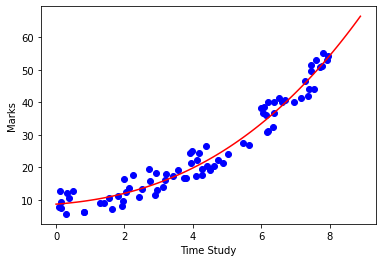

In [20]:
plt.scatter(train.time_study, train.Marks,  color='blue')
XX = np.arange(0.0, 9.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2) + clf.coef_[0][3] * np.power(XX, 3)
plt.plot(XX, yy, '-r')
plt.xlabel('Time Study')
plt.ylabel('Marks')

### Making Predictions

If you'd work 5 hours:

In [21]:
print("\nPolinomial Regression(degree=3):")
print(train_y_.predict(poly.fit_transform([[5]])))


Polinomial Regression(degree=3):
[[25.78059914]]


### Evaluation

In [22]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

Mean absolute error: 2.85
Residual sum of squares (MSE): 10.06
R2-score: 0.94


In [23]:
Ks = 11
mean_acc = np.zeros((Ks-1))

for i in range(1, Ks):
    poly = PolynomialFeatures(degree=i)
    train_x_poly = poly.fit_transform(train_x)
    
    clf = linear_model.LinearRegression()
    train_y_ = clf.fit(train_x_poly, train_y)
    test_x_poly = poly.fit_transform(test_x)
    test_y_ = clf.predict(test_x_poly)
    
    print(f"\nDegree {i}")
    print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
    print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
    print("R2-score: %.2f" % r2_score(test_y, test_y_))
    
    mean_acc[i-1]=r2_score(test_y, test_y_)

mean_acc


Degree 1
Mean absolute error: 3.86
Residual sum of squares (MSE): 21.72
R2-score: 0.88

Degree 2
Mean absolute error: 2.86
Residual sum of squares (MSE): 9.98
R2-score: 0.94

Degree 3
Mean absolute error: 2.85
Residual sum of squares (MSE): 10.06
R2-score: 0.94

Degree 4
Mean absolute error: 2.75
Residual sum of squares (MSE): 9.49
R2-score: 0.95

Degree 5
Mean absolute error: 2.64
Residual sum of squares (MSE): 9.38
R2-score: 0.95

Degree 6
Mean absolute error: 2.74
Residual sum of squares (MSE): 10.45
R2-score: 0.94

Degree 7
Mean absolute error: 2.70
Residual sum of squares (MSE): 10.08
R2-score: 0.94

Degree 8
Mean absolute error: 2.70
Residual sum of squares (MSE): 10.15
R2-score: 0.94

Degree 9
Mean absolute error: 2.71
Residual sum of squares (MSE): 10.10
R2-score: 0.94

Degree 10
Mean absolute error: 2.55
Residual sum of squares (MSE): 10.50
R2-score: 0.94


array([0.87879001, 0.9443271 , 0.9438771 , 0.94703223, 0.94767137,
       0.94168039, 0.94374442, 0.94338075, 0.94361945, 0.94141566])

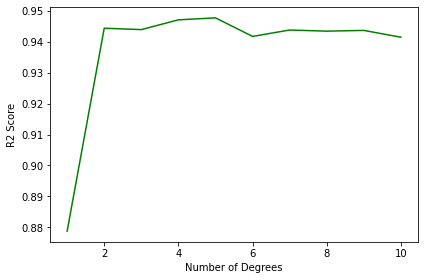

In [24]:
plt.plot(range(1, Ks), mean_acc, 'g')
plt.ylabel('R2 Score')
plt.xlabel('Number of Degrees')
plt.tight_layout()
plt.show()

In [25]:
print("The best accuracy was with", mean_acc.max(), "with degree=", mean_acc.argmax() + 1)

The best accuracy was with 0.947671372848121 with degree= 5
